 # Report
## 1. [Dataset 1](#Dataset_1)
For dataset 1, I am creating 300 samples of synthetic data using make_classification from sklearn.datasets (Make_classification, n.d.). Then, from the synthetic data, I am doing pre-processing independent variables (X) in DS1 with scale it using standardscaler(). This standardization is to ensure that the data following looks like a Gaussian distribution and limiting the impact of different unit used in data. For target variable (y), the 0 value was converted to -1 to ease the use of SVM in classification because usually SVM is denoted as f(x)=0. Before running the SVM, a scattered plot was used to explore the pattern of dataset 1. From the plot, the data pattern indicates we can classify with linear SVM.

   - [Training with Linear Kernel](###Training_with_whole_dataset_1_with_Linear_Kernel)
     The scatter plot indicates that data can be classified using a linear kernel. Using the default parameter linear SVM, in the initial condition, the model resulted in an accuracy of 0.91.  

   - [LOO Cross-Validation](###LeaveOneOut_Cross-Validation_Dataset_1)
     To start evaluate the tuning hyperparameter, we doing cross-validation using LeaveOneOut(). LeaveOneOut() provide cross-validation method which maximize the use of dataset in training phase; provide robust evaluation; and not require more abritary configuration like stratified K-fold.

   - [Tune Parameter C](###Tuning_Parameter_$C$)
     To find the best model, I am trying 3 different values of $, 10C$ {1, 2, 7}, 1 as representation of the default parameter value in SVC(). When $C$ = 2, we still got the same accuracy as the default parameter. Then we change it to 7, and the test accuracy increases to 0.91 compared to 0.90666 on the default parameter on the test  An when $C$ = 10, we get same accuracy as 7 so we choose 7 because bigger C is tend to overfit trining data.set before.
     In SVM, the trade-off between attaining a healthy margin and reducing training example misclassification is managed by the $C$ parameter. In order to enable the model to fit the training data more closely and possibly cause overfitting, a bigger $C$ value translates to a smaller margin. On the other hand, a lower C value yields a bigger margin, which can underfit the training set but enhance generalisation.

     
## 2. [Dataset 2](#Dataset_2)

   - [Training with Linear Kerneing](###Training_dataset_2_with_Linear_Kernel)
     Using linear kernel, Dataset 2 was classified with an accuracy of just 0.574. It is quite small because as we plot before indicates that the scatter plot between X1 and X2 does not show a linear pattern.
     
   - [Find best kernel](###Comparing_Dataset_2_with_other_than_Linear_Kernel)
     To elevate model performance, comparing performance on linear kernel with other kernel. From the plot and accuracy, we conclude that dataset 2 is better executed by using Gaussian/ RDF (radial-based-function). From this we get accuracy 0.574 on both training and testing dataset.
     
   - [Grid-Seach Hyperparameter $C$ and $\gamma$](###Grid Search_HyperParameter_Dataset_2)
     After finding RBF as best kernel, we trying GridSearch to find best parameter configuration. Because as before we found that RDF as the best kernel, we search along parameter that implies in RDF performance (Lameski et al., 2015) such $C$ and $\gamma$. Using Grid-Search, We found $C$ = 7 and $\gamma$ = 'scale' as best parameter setting for this dataset.
     
   - [LOO Cross-Validation](###LeaveOneOut_Cross-Validation_Dataset_2)
     After finding best parameter setting, we running it using LOO cross-validation to compare with model performance in linear kernel. Using this validation, we get 0.935 accuracy on traning set and 0.928 on test set. Compare with cross-validation before, we concclude that the use of RBF kernel and certain parameter setting has increase the accuracy significantly.
     
   - [Run Best Parameter on Whole Dataset](###Running_Best_Parameter_on_Whole_Dataset_2)
     We get 0.93 accuracy while traininig whole dataset 2 on RBF kernel and best parameter settings.
     
## 3. [Dataset 3](#Dataset_3)
Using scatter plot, the dataset 3 indicate linear separable.

   - [Training with Linear Kernel](###Training_with_whole_dataset_3_with_Linear_Kernel)
     Using linear kernel on dataset 3, resulted 0.96 accuracy. It proves that dataset 3 is liearly separable. 
     
   - [Find best Kernel](###Comparing_Dataset_3_with_other_than_Linear_Kernel)
     In order to elevate model peformance, we trying other kernel. From this part, we get RBF kernel with accuracy 0.945 and 0.905 with polynomial kernel. In addition Linear kernel is subset/ special case of RBF kernels (Apostolidis-Afentoulis, 2015; Creator, 2019; Radial Basis Function Kernel - Wikipedia, n.d.)
     
   - [Grid-Seach Hyperparameter $C$ and $\gamma$](###Grid-Search_HyperParameter_Dataset_3)
Same with Dataset 2, we search best possible parameter using Grid-Search (Lameski et al., 2015). From this step, we get $C% = 8 and $\gamma$ = 1 as best parameter settings for this case.
     
   - [LOO Cross-Validation](###LeaveOneOut_Cross-Validation_Dataset_3)
To compare apple to apple with linear model, we split training for best model using LeaveOneOut to compare both training and test set with linear kernel. In this cross validation for best model, we get 0.97 accuracy for both training and test set.
     
   - [Run Best Parameter on Whole Dataset](###Running_Best_Parameter_on_Whole_Dataset_3)
After we conclude that using RBF with C=8 and gamma=7 performs better than using linear kernel for both training and test set, we run this configuration for the whole dataset and get 0.975 accuracy with a non-linear margin that separates class more smooth.

 ## Reference
Apostolidis-Afentoulis, V. (2015). SVM Classification with Linear and RBF kernels. https://doi.org/10.13140/RG.2.1.3351.4083
Creator. (2019, May 13). Can we get resonable classifice RBF kernel for linearly sepable data? [Forum post]. Cross Validated. https://stats.stackexchange.com/q/408196
Lameski, P., Zdravevski, E., Mingov, R., & Kulakov, A. (2015). SVM Parameter Tuning with Grid Search and Its Impact on Reduction of Model Over-fitting. In Y. Yao, Q. Hu, H. Yu, & J. W. Grzymala-Busse (Eds.), Rough Sets, Fuzzy Sets, Data Mining, and Granular Computing (pp. 464–474). Springer International Publishing. https://doi.org/10.1007/978-3-319-25783-9_41
Radial basis function kernel—Wikipedia. (n.d.). Retrieved May 28, 2024, from httpsn.wikipedia.org/wiki/Radial_basis_function_kernel

  
rameter_on_Whole_Dataset_3)
     
 


In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import LeaveOneOut, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plot
from sklearn.preprocessing import StandardScaler

def plot_dec_bound(X, y, clf, info):
    plot.scatter(X[:, 0], X[:, 1], c=y, cmap=plot.cm.Paired, marker='h')
    w = plot.gca()
    Xl = w.get_xlim()
    yl = w.get_ylim()
    xx, yy = np.meshgrid(np.linspace(Xl[0], Xl[1], 50), 
                        np.linspace(yl[0], yl[1], 50))
    M = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    M = M.reshape(xx.shape)
    plot.contour(xx, yy, M, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--', '-', '--'])
    plot.title(info)
    plot.show()

## Dataset 1

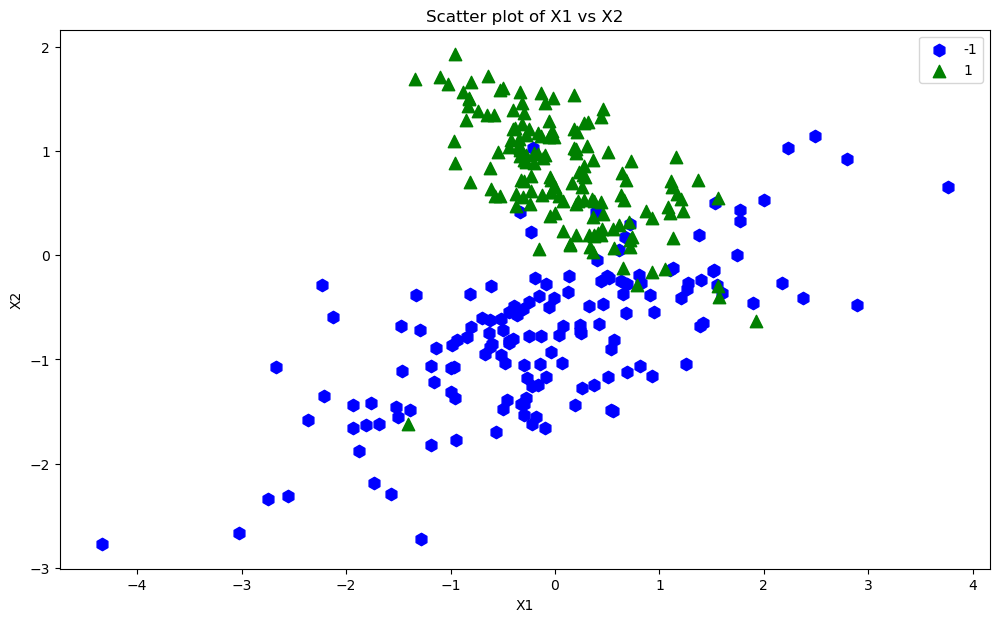

In [14]:
synth_data = make_classification(n_samples=300, n_redundant=0, n_clusters_per_class=1, n_features=2, random_state=17)

X, y = synth_data
y[y==0] = -1
DS1 = pd.DataFrame(X, columns=['X1', 'X2'])
DS1['y'] = y

#scalling the feature X
std = StandardScaler()
std.fit(X)
DS1[['X1_std', 'X2_std']] = std.transform(X)
X1 = DS1['X1_std'].values
X2 = DS1['X2_std'].values

#Save dataset 1 to csv
DS1.to_csv('DS1.csv')

plot.figure(figsize=(12, 7))

# Plot class -1
plot.scatter(X1[y == -1], X2[y == -1], s=80, c='blue', marker='h', label='-1')

# Plot class 1
plot.scatter(X1[y == 1], X2[y == 1], s=80, c='green', marker='^', label='1')

plot.xlabel('X1')
plot.ylabel('X2')
plot.legend()
plot.title('Scatter plot of X1 vs X2')

plot.show()

### Training with whole dataset 1 with Linear Kernel

Accuracy 0.91


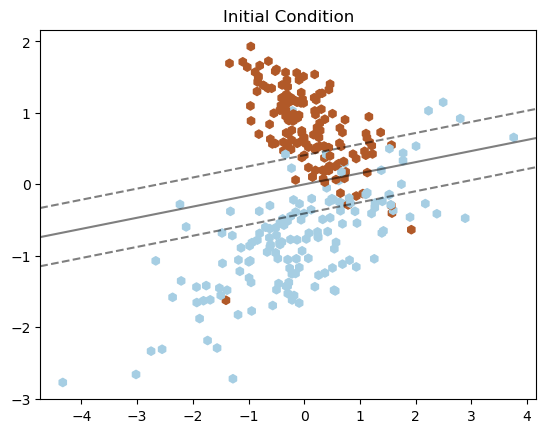

In [15]:
X_std = DS1[['X1_std', 'X2_std']].values
model = SVC(kernel='linear')
model.fit(X_std, y)
acc = model.score(X_std, y)
print("Accuracy", acc)

plot_dec_bound(X_std, y, model, "Initial Condition")

### LeaveOneOut Cross-Validation Dataset 1

In [16]:
loo = LeaveOneOut()
train_sc = []
test_sc = []

for i, j in loo.split(X_std):
    X_train, X_test = X[i], X[j]
    y_train, y_test = y[i], y[j]
    model_cv = SVC(kernel='linear')
    model_cv.fit(X_train, y_train)
    train_sc.append(model_cv.score(X_train, y_train))
    test_sc.append(model_cv.score(X_test, y_test))

acc_train = np.mean(train_sc)
print(f"Average Training Accuracy:", acc_train)
acc_test = np.mean(test_sc)
print(f"Average Test Accuracy:", acc_test)

Average Training Accuracy: 0.9108138238573024
Average Test Accuracy: 0.9066666666666666


### Tuning Parameter C

Test Accuracy 0.9066666666666666


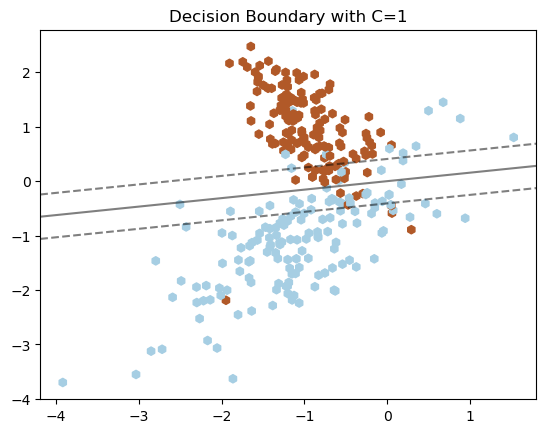

Test Accuracy 0.9066666666666666


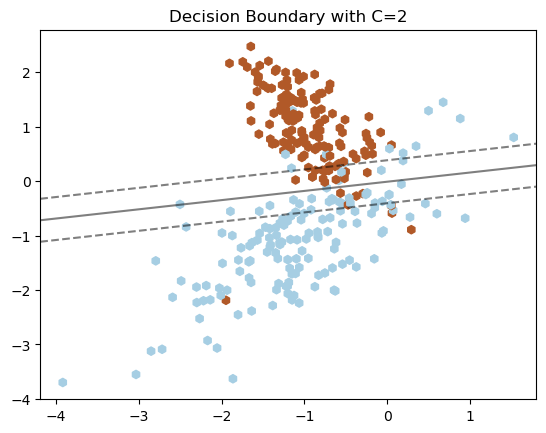

Test Accuracy 0.91


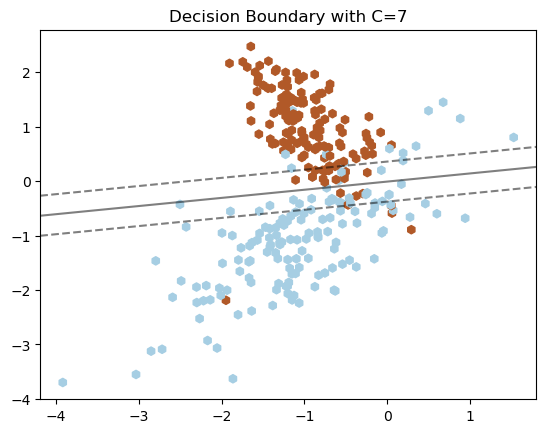

Test Accuracy 0.91


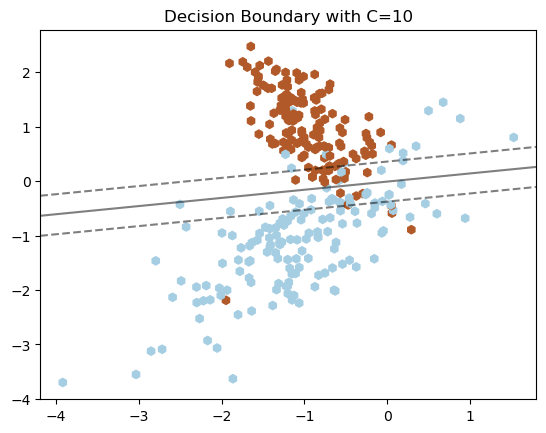

In [17]:
c = [1, 2, 7, 10]
for value in c:
    model_c = SVC(kernel='linear', C=value)
    model_c.fit(X_std, y)
    scc = cross_val_score(model_c, X_std, y, cv=loo)
    print("Test Accuracy", scc.mean())
    plot_dec_bound(X, y, model_c, f"Decision Boundary with C={value}")

## Dataset 2

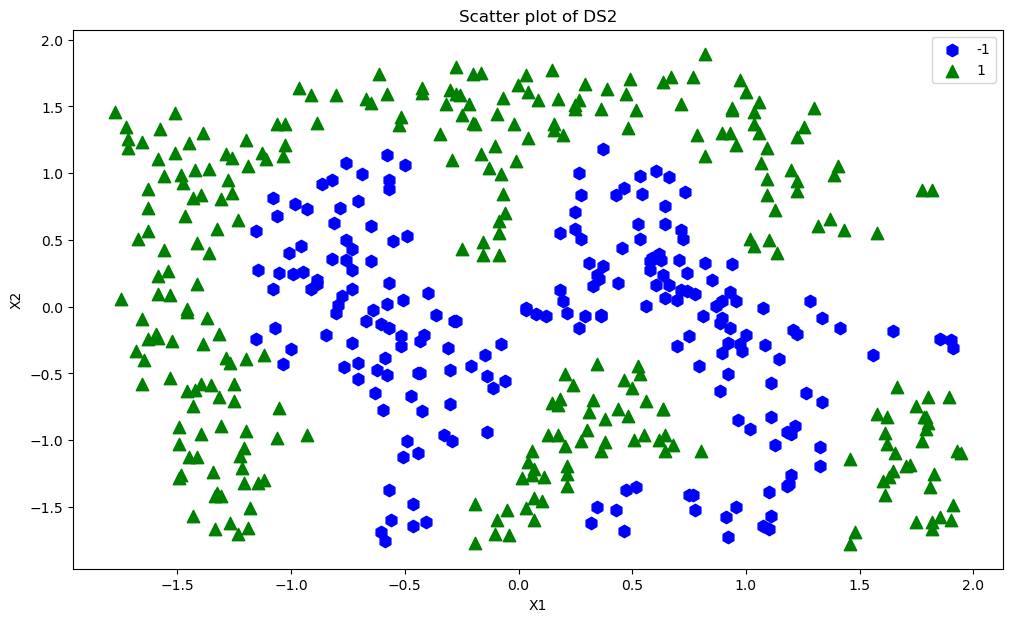

In [18]:
DS2 = pd.read_csv('/Users/mac/Documents/762/data/D2.csv', header=None)

var = ['X1','X2', 'y']
DS2.columns = var
X = DS2[['X1','X2']].values
std = StandardScaler()
std.fit(X)
DS2[['X1_std', 'X2_std']] = std.transform(X)

X1 = DS2[['X1_std']].values
X2 = DS2[['X2_std']].values
y = DS2['y'].values

plot.figure(figsize=(12, 7))

# Plot class -1
plot.scatter(X1[y == -1], X2[y == -1], s=80, c='blue', marker='h', label='-1')

# Plot class 1
plot.scatter(X1[y == 1], X2[y == 1], s=80, c='green', marker='^', label='1')

plot.xlabel('X1')
plot.ylabel('X2')
plot.legend()
plot.title('Scatter plot of DS2')

plot.show()

### Training dataset 2 with Linear Kernel

Accuracy 0.574


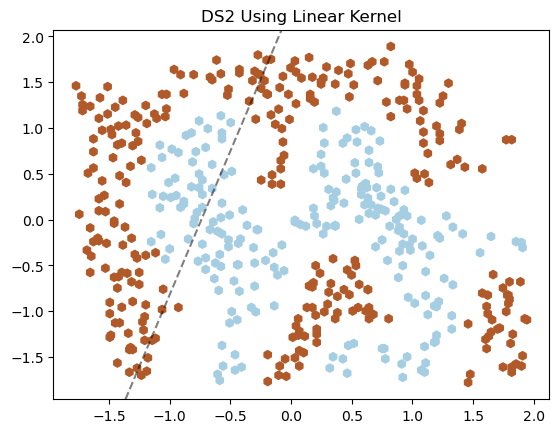

In [19]:
X_std = DS2[['X1_std', 'X2_std']].values
model2_lin = SVC(kernel='linear')
model2_lin.fit(X_std, y)
acc = model2_lin.score(X_std, y)
print("Accuracy", acc)

plot_dec_bound(X_std, y, model2_lin, "DS2 Using Linear Kernel")

### Cross-Validation Dataset 2 Linear Kernel

In [20]:
train2_sc = []
test2_sc = []

for i, j in loo.split(X_std):
    X_train, X_test = X[i], X[j]
    y_train, y_test = y[i], y[j]
    model2_cv = SVC(kernel='linear')
    model2_cv.fit(X_train, y_train)
    train2_sc.append(model2_cv.score(X_train, y_train))
    test2_sc.append(model2_cv.score(X_test, y_test))

acc_train2 = np.mean(train2_sc)
print("Average Training Accuracy:", acc_train2)
acc_test2 = np.mean(test2_sc)
print("Average Test Accuracy:", acc_test2)

Average Training Accuracy: 0.574
Average Test Accuracy: 0.574


### Comparing Dataset 2 with other than Linear Kernel

Test Accuracy rbf: 0.854


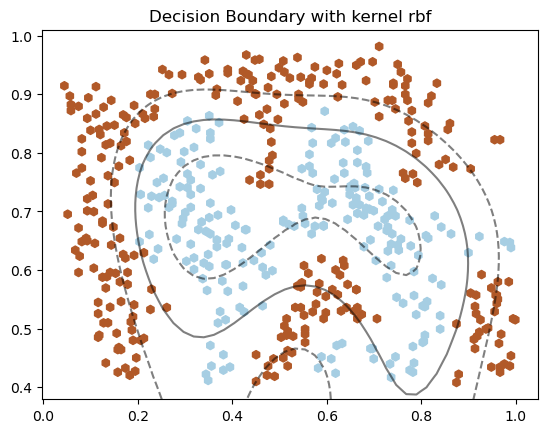

Test Accuracy poly: 0.492


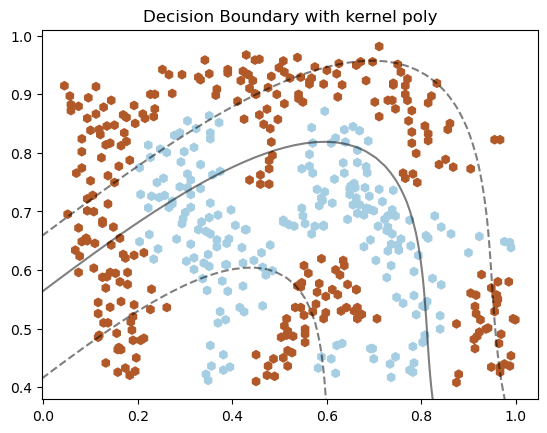

Test Accuracy sigmoid: 0.576


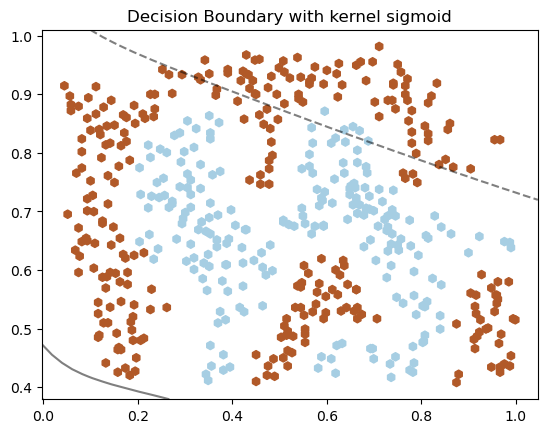

In [21]:
X_std = DS2[['X1_std', 'X2_std']].values
kernels = ['rbf', 'poly', 'sigmoid']
for kernel in kernels:
    model2_kernel = SVC(kernel=kernel)
    model2_kernel.fit(X_train, y_train)
    acc = cross_val_score(model2_kernel, X_std, y, cv=loo)
    print(f"Test Accuracy {kernel}:", acc.mean())
    plot_dec_bound(X, y, model2_kernel, f"Decision Boundary with kernel {kernel}")

### Grid-Search HyperParameter Dataset 2

In [22]:
hp_grid = {
    'C': [1, 2, 4, 6, 7, 8, 10],
    'gamma': ['scale', 'auto']
}

svc = SVC()

grid_search = GridSearchCV(estimator=svc, param_grid=hp_grid, cv=loo, n_jobs=-1)

grid_search.fit(X_std, y)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')

Best Parameters: {'C': 7, 'gamma': 'scale'}
Best Score: 0.916


### LeaveOneOut Cross-Validation Dataset 2

In [23]:
train2_sc = []
test2_sc = []
model2_cv = SVC(kernel='rbf', C=7, gamma='scale')
for i, j in loo.split(X_std):
    X_train, X_test = X[i], X[j]
    y_train, y_test = y[i], y[j]
    model2_cv.fit(X_train, y_train)
    train2_sc.append(model2_cv.score(X_train, y_train))
    test2_sc.append(model2_cv.score(X_test, y_test))

acc_train3 = np.mean(train2_sc)
print("Average Training Accuracy", acc_train3)
acc_test3 = np.mean(test2_sc)
print("Average Test Accuracy", acc_test3)

Average Training Accuracy 0.9359799599198397
Average Test Accuracy 0.928


### Running Best Parameter on Whole Dataset 2

Accuracy 0.93


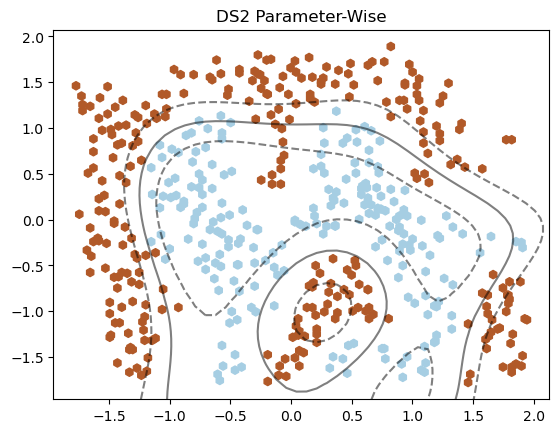

In [24]:
X_std = DS2[['X1_std', 'X2_std']].values
model2 = SVC(C=7)
model2.fit(X_std, y)
acc = model2.score(X_std, y)
print("Accuracy", acc)

plot_dec_bound(X_std, y, model2, "DS2 Parameter-Wise")

## Dataset 3

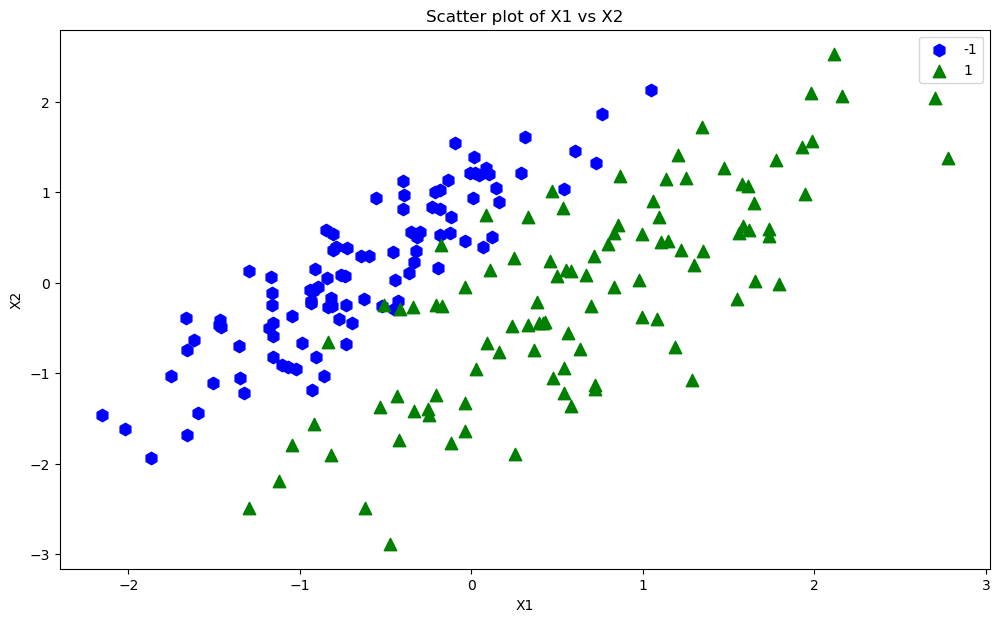

In [25]:
DS3 = pd.read_csv('/Users/mac/Documents/762/data/D3.csv', header=None)

var = ['X1','X2', 'y']
DS3.columns = var
X = DS3[['X1','X2']].values
std.fit(X)
DS3[['X1_std', 'X2_std']] = std.transform(X)

X1 = DS3[['X1_std']].values
X2 = DS3[['X2_std']].values
y = DS3['y'].values
y[y==0] = -1

plot.figure(figsize=(12, 7))

# Plot class -1
plot.scatter(X1[y == -1], X2[y == -1], s=80, c='blue', marker='h', label='-1')

# Plot class 1
plot.scatter(X1[y == 1], X2[y == 1], s=80, c='green', marker='^', label='1')

plot.xlabel('X1')
plot.ylabel('X2')
plot.legend()
plot.title('Scatter plot of X1 vs X2')

plot.show()

### Training with whole dataset 3 with Linear Kernel

Accuracy 0.96


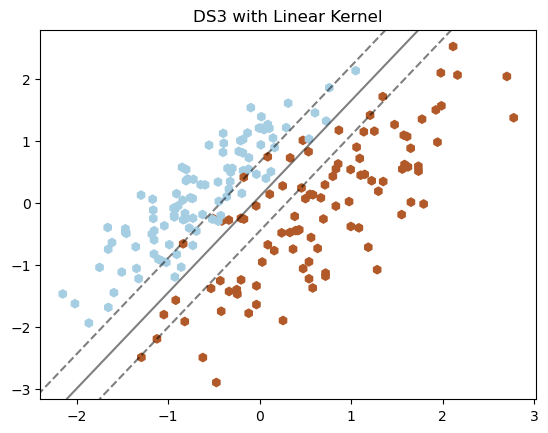

In [26]:
X_std = DS3[['X1_std', 'X2_std']].values
model = SVC(kernel='linear')
model.fit(X_std, y)
acc = model.score(X_std, y)
print("Accuracy", acc)

plot_dec_bound(X_std, y, model, "DS3 with Linear Kernel")

### Cross-Validation Dataset 3 Linear Kernel

In [27]:
train3_sc = []
test3_sc = []

for i, j in loo.split(X_std):
    X_train, X_test = X[i], X[j]
    y_train, y_test = y[i], y[j]
    model3_cv = SVC(kernel='linear')
    model3_cv.fit(X_train, y_train)
    train3_sc.append(model3_cv.score(X_train, y_train))
    test3_sc.append(model3_cv.score(X_test, y_test))

acc_train3 = np.mean(train3_sc)
print("Average Training Accuracy", acc_train3)
acc_test3 = np.mean(test3_sc)
print("Average Test Accuracy", acc_test3)

Average Training Accuracy 0.96
Average Test Accuracy 0.96


### Comparing Dataset 3 with other than Linear Kernel

Test Accuracy 0.945


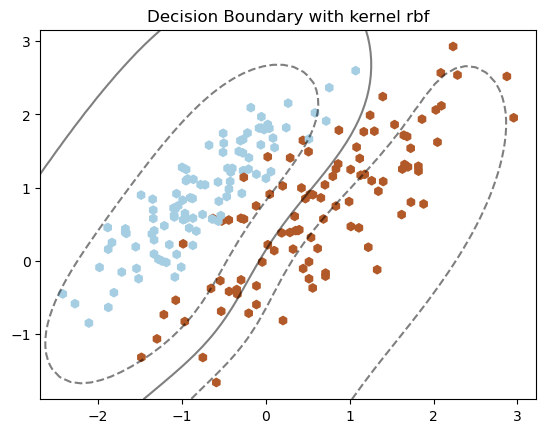

Test Accuracy 0.905


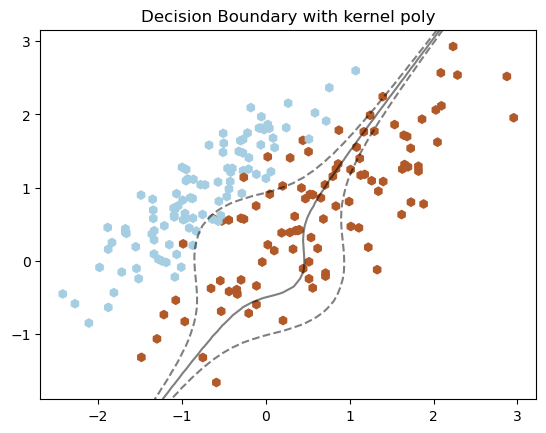

Test Accuracy 0.83


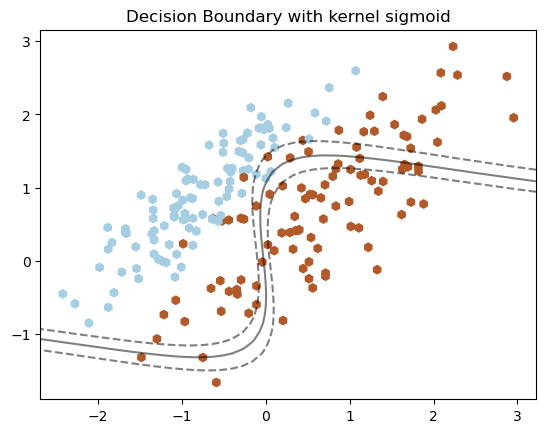

In [28]:
X_std = DS3[['X1_std', 'X2_std']].values
kernels = ['rbf', 'poly', 'sigmoid']
for kernel in kernels:
    model3_kernel = SVC(kernel=kernel)
    model3_kernel.fit(X_std, y)
    acc = cross_val_score(model3_kernel, X_std, y, cv=loo)
    print("Test Accuracy", acc.mean())
    plot_dec_bound(X, y, model3_kernel, f"Decision Boundary with kernel {kernel}")

### Grid-Search HyperParameter Dataset 3

In [29]:
param_grid = {
    'C': [1, 4, 6, 7, 8, 10],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 'scale', 'auto']
}


grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=loo, n_jobs=-1)

grid_search.fit(X_std, y)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')

Best Parameters: {'C': 8, 'gamma': 1}
Best Score: 0.965


### LeaveOneOut Cross-Validation Dataset 3

In [30]:
train3_sc = []
test3_sc = []
model3_cv = SVC(kernel='rbf', C=8, gamma=1)
for i, j in loo.split(X_std):
    X_train, X_test = X[i], X[j]
    y_train, y_test = y[i], y[j]
    model3_cv.fit(X_train, y_train)
    train3_sc.append(model3_cv.score(X_train, y_train))
    test3_sc.append(model3_cv.score(X_test, y_test))

acc_train3 = np.mean(train3_sc)
print("Average Training Accuracy", acc_train3)
acc_test3 = np.mean(test3_sc)
print("Average Test Accuracy", acc_test3)

Average Training Accuracy 0.9700502512562815
Average Test Accuracy 0.97


### Running Best Parameter on Whole Dataset 3

Accuracy 0.975


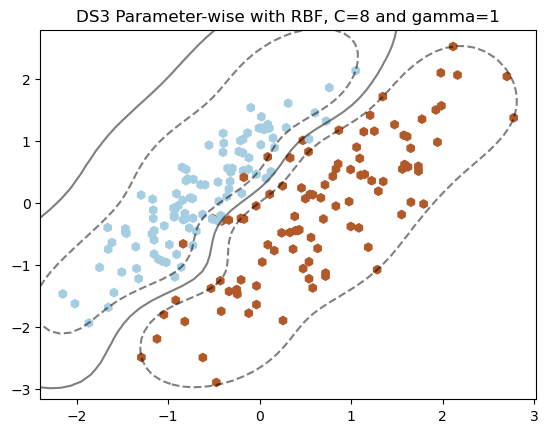

In [31]:
model3_cv.fit(X_std, y)
acc = model3_cv.score(X_std, y)
print("Accuracy", acc)

plot_dec_bound(X_std, y, model3_cv, "DS3 Parameter-wise with RBF, C=8 and gamma=1")